In [1]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.4 MB/s eta 0:00:00


In [5]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas

# Import the K-means algorithm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("restaurants_with_sentiment.csv")

# Review the DataFrame
df.head()

,Restaurant_Name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
0,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,the food met my expectation the seating area w...,0.9607,Good
1,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,2,its a wendys their food is good better than mc...,0.1966,Bad
2,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,3,i love the taste of this food as it tastes lik...,0.8198,Good
3,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,this is the best wendys ive ever been to incre...,0.9287,Good
4,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,i been here so many times i never had a proble...,0.5613,Good


In [12]:
df.columns

Index(['Restaurant_Name', 'Category', 'Address', 'Province', 'Latitude',
       'Longitude', 'Rating', 'Review', 'Sentiment_score', 'Sentiment'],
      dtype='object')

In [13]:
X = df[['Rating', 'Latitude', 'Longitude']].values

In [14]:
num_clusters = 5

In [15]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [16]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

In [17]:
df['cluster_label'] = cluster_labels

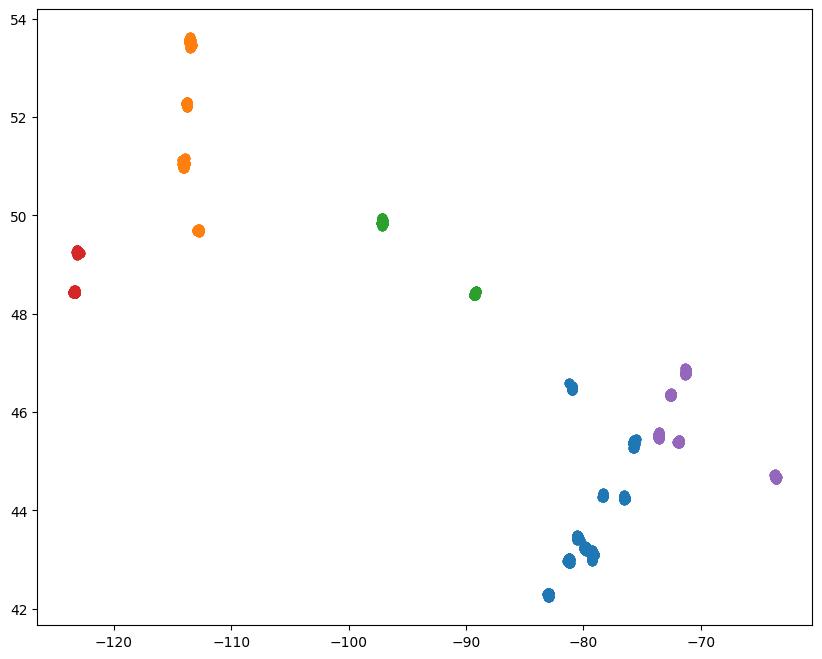

In [19]:
plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    cluster_data = df[df['cluster_label'] == cluster_label]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_label + 1}')

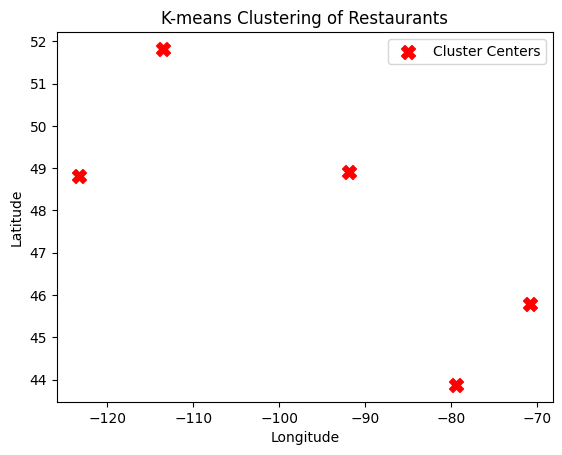

In [20]:
plt.scatter(cluster_centers[:, 2], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Restaurants')
plt.legend()
plt.show()
